In [1]:
include("/Users/simon/Documents/DTU fag/syntese/Code/syntese/coords2index/load_s1slc_ann.jl");
include("SlcRaw.jl");

### Paths

In [2]:
f = open("ann_path.txt")
ann_path = readlines(f)[1]

f = open("data_path.txt")
data_path = readlines(f)[1]

"/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.tiff"

In [3]:
view = [2001:7000, 1001:9000]

2-element Array{UnitRange{Int64},1}:
 2001:7000
 1001:9000

## Load data

In [4]:
test = SlcRaw(view,load_s1slc_ann(ann_path),load_s1slc_data(data_path,view))

SlcRaw:: S1B-IW-VV-Swath3 2017-03-15T05:39:00 View:[2001:7000,1001:9000]

In [5]:
typeof(test)

SlcRaw

In [6]:
test.view

2-element Array{UnitRange,1}:
 2001:7000
 1001:9000

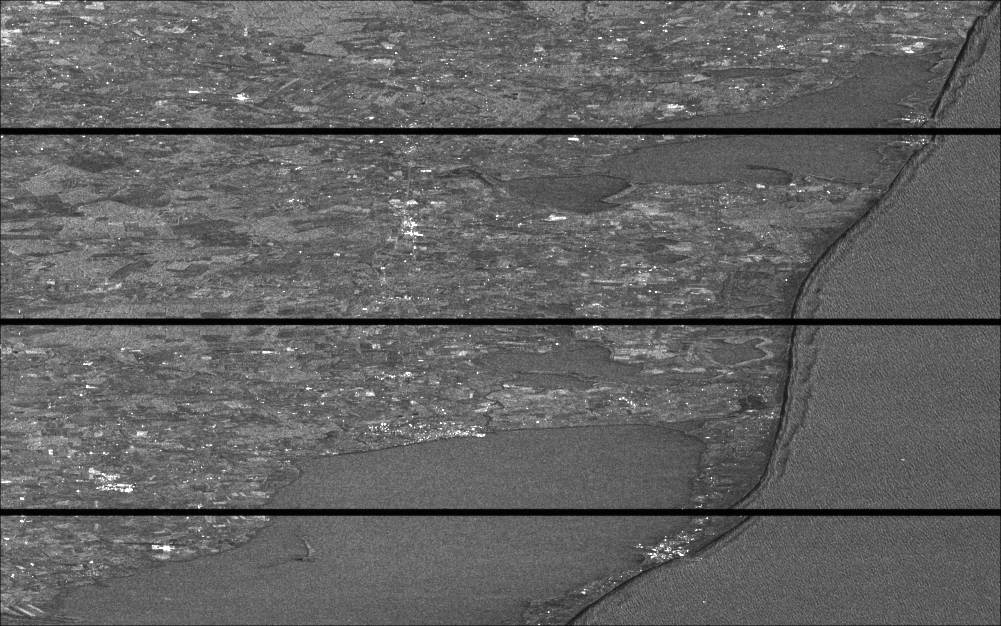

In [7]:
show_img(test)

### Get subset

In [8]:
test_subset = test[1001:2000,2001:6000]

SlcRaw:: S1B-IW-VV-Swath3 2017-03-15T05:39:00 View:[3001:4000,3001:7000]

In [9]:
test_subset.view

2-element Array{UnitRange,1}:
 3001:4000
 3001:7000

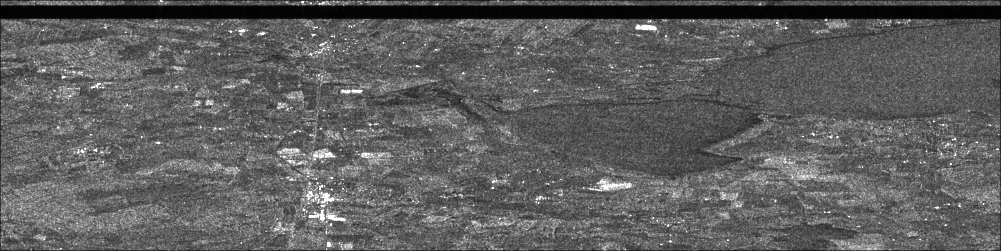

In [10]:
show_img(test_subset)

### Get size and mosaic view

In [11]:
size(test_subset)

(1000, 4000)

In [12]:
mosaic_view(test_subset)

2-element Array{UnitRange{Int64},1}:
 2684:3635
 3001:7000

In [13]:
original_view(test_subset)

2-element Array{UnitRange{Int64},1}:
 1:15240
 1:25330

In [14]:
#total mosaic
mosaic_view(test_subset.meta,original_view(test_subset))

2-element Array{UnitRange{Int64},1}:
 1:13601
 1:25330

### Get approximated footprint and print to maps.co format

Note that footprint is approximated using interpolation and geo_locations.

!!! It is only the corners that are considered regardless of the burst structure !!!!

In [15]:
a= footprint(test_subset.meta,original_view(test_subset))

([56.6682, 55.0213, 55.1425, 56.7901], [8.69213, 8.18786, 6.86364, 7.30989])

In [17]:
_print2maps_co(footprint(test_subset.meta,original_view(test_subset))...)

56.66818777336966,8.692126035601964,Corner,#FF0000
55.021338864095426,8.187855550071468,Corner,#FF0000
55.14254440468461,6.863640814446699,Corner,#FF0000
56.7901456330701,7.309890899573154,Corner,#FF0000
